In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import scipy.stats

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['sales'].values.reshape(-1, 1)
X = data[['TV','radio','newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


The model where the outcome Sales is predicted by the features TV, Radio, and Newspaper explains 89.7% of the variance in Sales.  Note that we don't know from these results how much of that variance is explained by each of the three features.  Looking at the coefficients, there appears to be a base rate of Sales that happen even with no ads in any medium (intercept: 2.939) and sales have the highest per-unit increase when ads are on the radio (0.189).  


### Assumption two: multivariate normality

The error from the model (calculated by subtracting the model-predicted values from the real outcome values) should be normally distributed.  Since ordinary least squares regression models are fitted by choosing the parameters that best minimize error, skewness or outliers in the error can result in serious miss-estimations.

Outliers or skewness in error can often be traced back to outliers or skewness in data.  

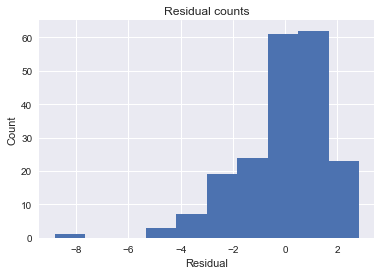

In [3]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


### Assumption three: homoscedasticity

The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or **homoscedastic**.

For example, if your error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance.  This leads to overconfidence in the accuracy of your model's predictions.

Some fixes to heteroscedasticity include transforming the dependent variable and adding features that target the poorly-estimated areas. For example, if a model tracks data over time and model error variance jumps in the September to November period, a binary feature indicating season may be enough to resolve the problem.

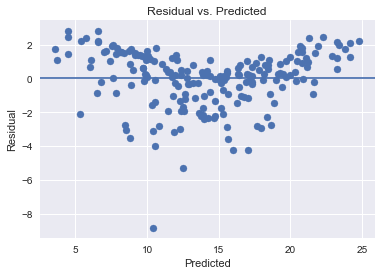

In [4]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

### Assumption four: low multicollinearity

Correlations among features should be low or nonexistent.  When features are correlated, they may both explain the same pattern of variance in the outcome.  The model will attempt to find a solution, potentially by attributing half the explanatory power to one feature and half to the other.  This isn’t a problem if our only goal is prediction, because then all that matters is that the variance gets explained.  However, if we want to know which features matter most when predicting an outcome, multicollinearity can cause us to underestimate the relationship between features and outcomes.

Multicollinearity can be fixed by PCA or by discarding some of the correlated features.

In [5]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,radio,newspaper
TV,1.000,0.055,0.057
radio,0.055,1.000,0.354
newspaper,0.057,0.354,1.000


## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.

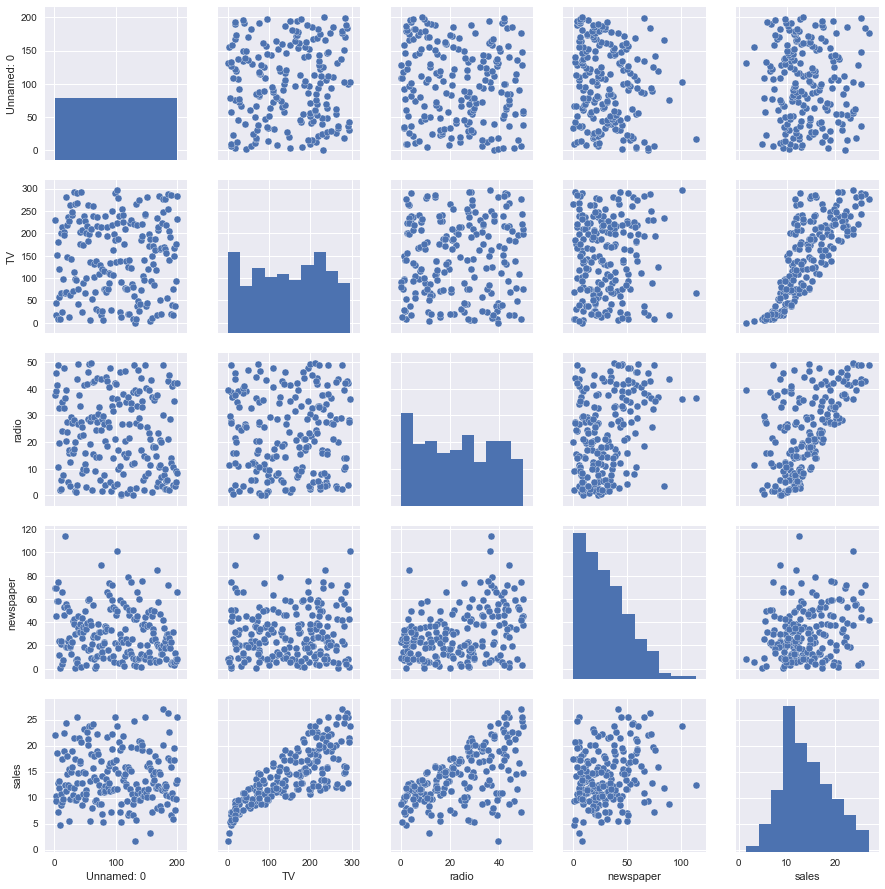

In [6]:
# Your code here.

#lets start with a pair plot
sns.pairplot(data)

In [7]:
#interesting relationships between TV and sales. more variance as TV ads increase.
#The other variables do not seem to be normally distributed. 

## Sales 

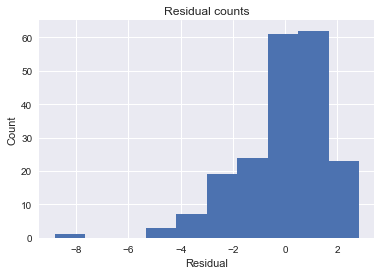

In [8]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

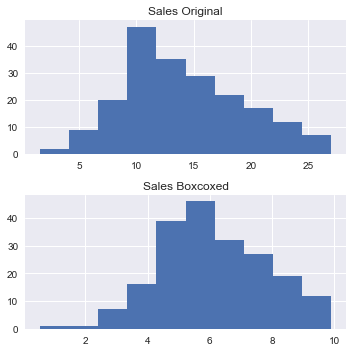

In [9]:
#skewness in our error (multivariate nomrality issue)
#Lets do a box cox power transformation of sales
data['sales_boxcox'] = scipy.stats.boxcox(data['sales'])[0]
plt.figure(figsize=(5,5))

plt.subplot(2,1,1)
plt.hist(data['sales'])
plt.title('Sales Original')

plt.subplot(2,1,2)
plt.hist(data['sales_boxcox'])
plt.title('Sales Boxcoxed')

plt.tight_layout()

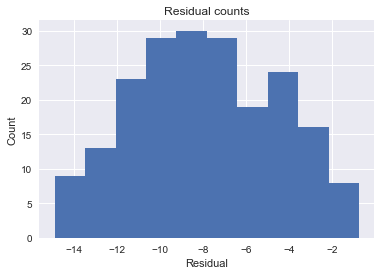

In [10]:

#looks better, now lets look at residuals again
# Extract predicted values.
predicted_2 = regr.predict(X).ravel()
actual_2 = data['sales_boxcox']

# Calculate the error, also called the residual.
residual_2 = actual_2 - predicted_2

# This looks a bit concerning.
plt.hist(residual_2)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [11]:
#hey! this looks better

## TV

In [12]:
#lets try a squareroot transformation of TV

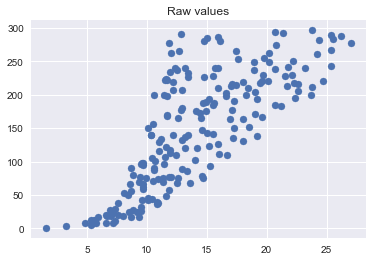

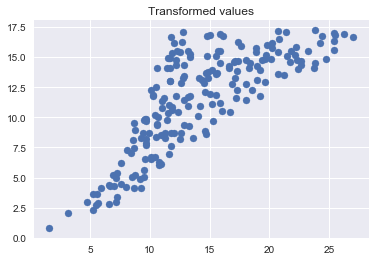

In [13]:
# Create initial plot of TV
plt.scatter(data['sales'], data['TV'])
plt.title('Raw values')
plt.show()

#Transform TV and replot to see if relationship becomes more linear 
data['tv_sqrt'] = np.sqrt(data['TV'])

plt.scatter(data['sales'], data['tv_sqrt'])
plt.title('Transformed values')
plt.show()

In [14]:
#also better

## Newpaper
I might want to remove this entirely based on the very (close to 0) coefficient, meaning it has little effect on outcome variable. 
However, the distribution of newpaper almost looks lognormal. Let take the log of it.

In [15]:
data['log_newspaper'] = np.log(data['newspaper'])


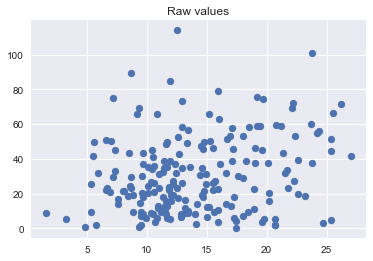

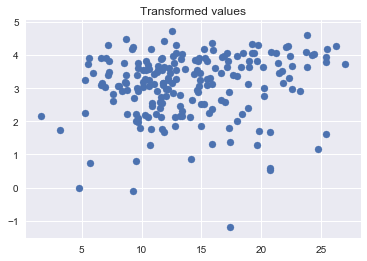

In [16]:
# Create initial plot of TV
plt.scatter(data['sales'], data['newspaper'])
plt.title('Raw values')
plt.show()


plt.scatter(data['sales'], data['log_newspaper'])
plt.title('Transformed values')
plt.show()

In [17]:
#not sure if this is doing much, but I want to take a look at the pair plot again

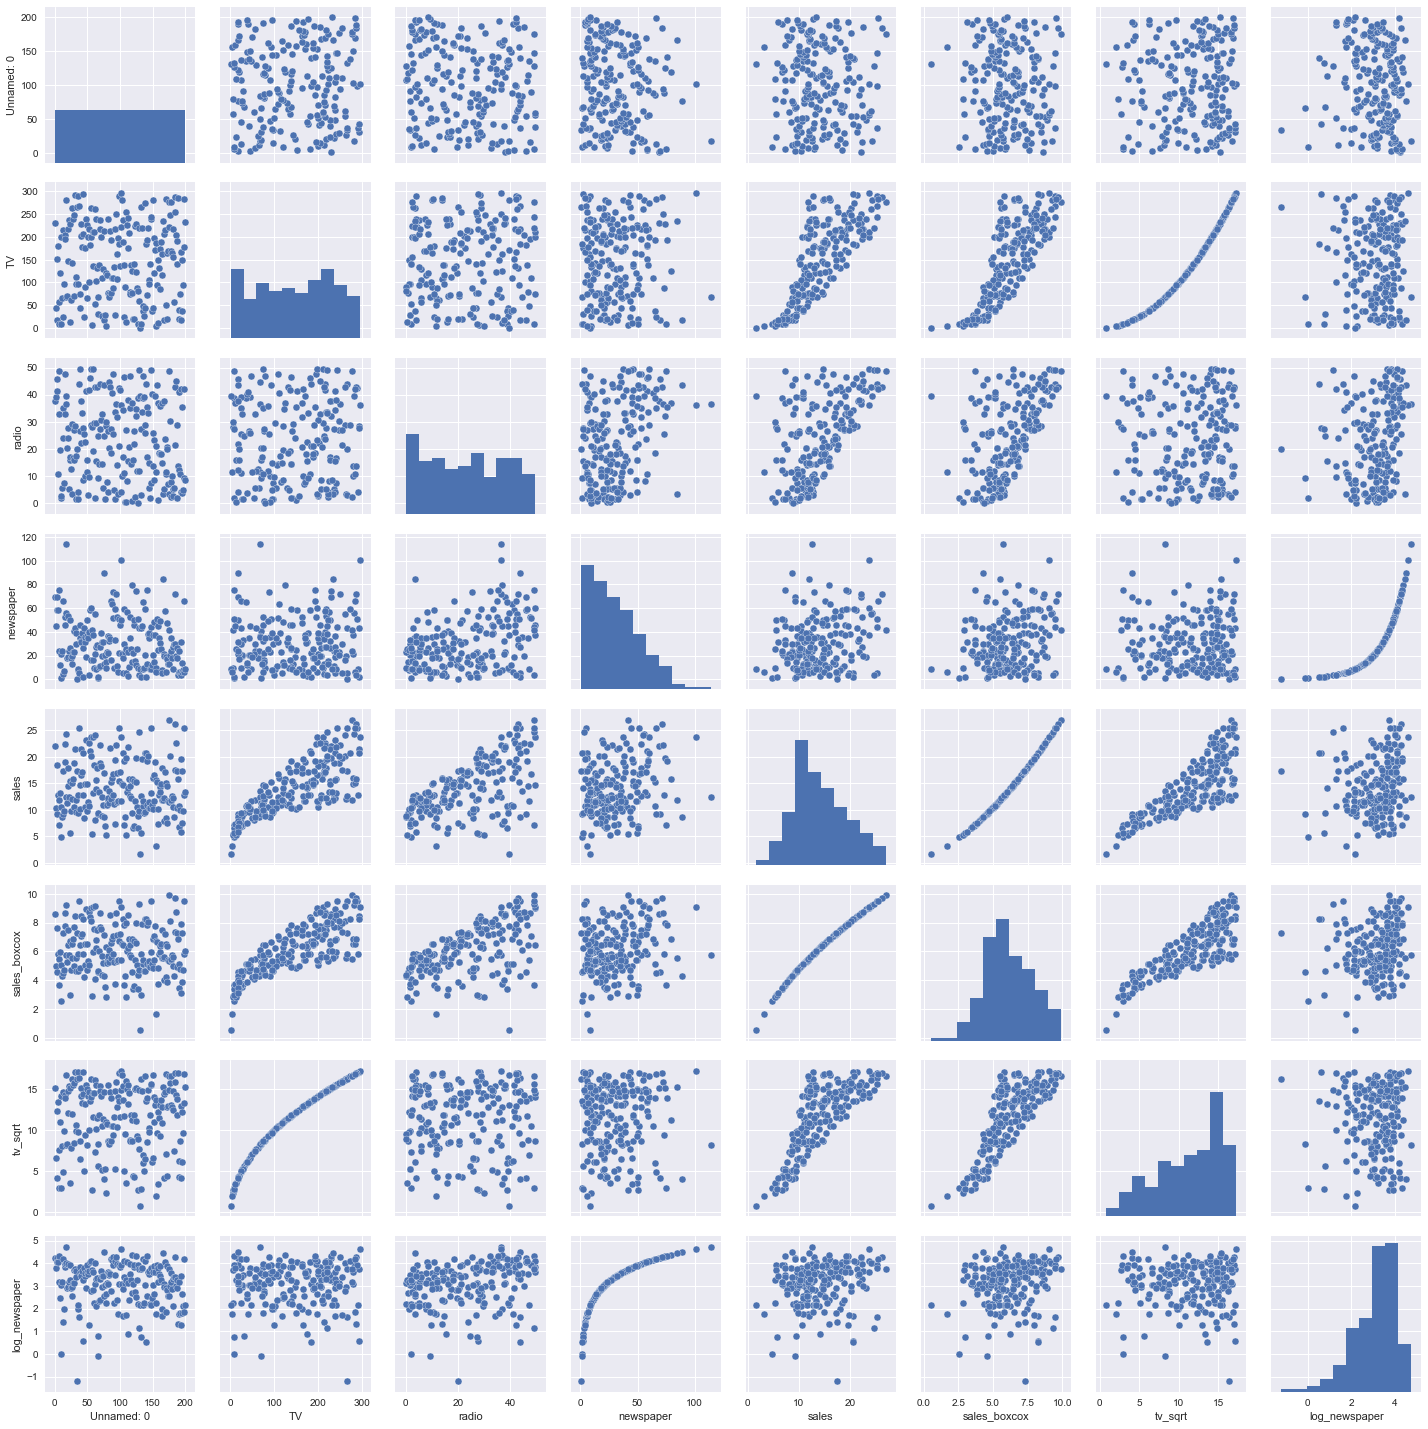

In [18]:
sns.pairplot(data)

In [19]:
#ok, going to give this a shot now

In [20]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['sales_boxcox'].values.reshape(-1, 1)
X = data[['tv_sqrt','radio','log_newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))




Coefficients: 
 [[ 0.33540325  0.06056825  0.00980048]]

Intercept: 
 [ 0.82656033]

R-squared:
0.937358215233


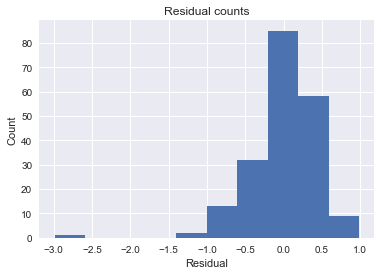

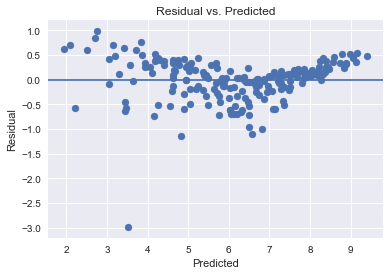

In [21]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales_boxcox']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [22]:
#ok im going to go ahead and remove newspaper, coeficient still low


In [23]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['sales_boxcox'].values.reshape(-1, 1)
X = data[['tv_sqrt','radio']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))



Coefficients: 
 [[ 0.33546101  0.06072006]]

Intercept: 
 [ 0.85251488]

R-squared:
0.937329643273


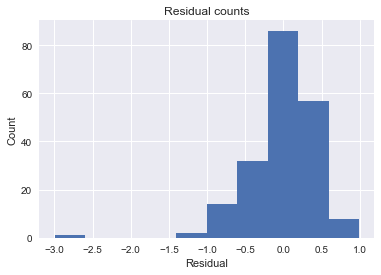

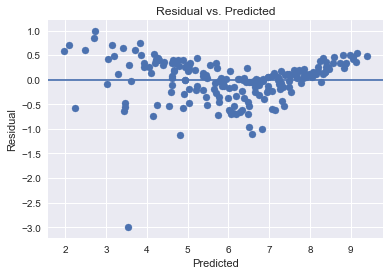

In [24]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales_boxcox']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [25]:
#beter than the first one, but still not great. try one more thing, with newspaper

In [30]:
#lets take the square root of sales
#Transform TV and replot to see if relationship becomes more linear 
data['sales_sqrt'] = np.sqrt(data['sales'])

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['sales_sqrt'].values.reshape(-1, 1)
X = data[['tv_sqrt','radio','newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))



Coefficients: 
 [[ 0.1381653   0.02443798  0.00014568]]

Intercept: 
 [ 1.52872085]

R-squared:
0.935852367543


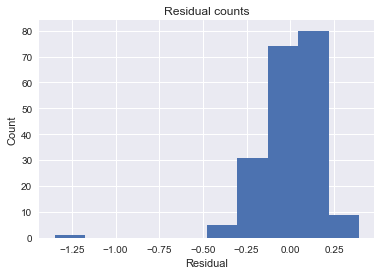

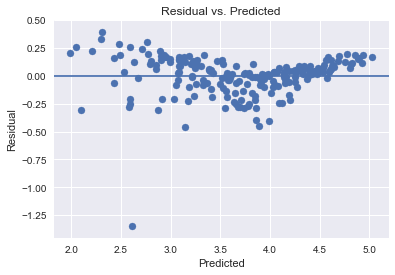

In [31]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales_sqrt']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
#next stop would probably be to remove outliers. 
# @Vincent, can we go over what I have tomorrow? 